In [1]:
from brickschema import Graph
import matplotlib.pyplot as plt
import pandas as pd
import rdflib

2024-10-08:00:21:25,950 WARNING [__init__.py:22] sqlalchemy not installed. SQL-backed graph support will not be available. Try 'pip install brickschema[persistence]' to install it.


No module named 'pkg_resources'


Load the building model:

In [2]:
g = Graph(load_brick=True)
g.load_file("../../datasets/bts_site_b_train/Site_B_cleaned.ttl")
print(f"Building model has {len(g)} triples")

Building model has 52457 triples


Expand the building model through inference:

In [3]:
g.expand(profile="rdfs") # inference using RDFS reasoning
print(f"Expanded building model has {len(g)} triples")

Expanded building model has 89052 triples


In [4]:
g.expand(profile="shacl") # infererence using Brick classes from Brick tags
print(f"Expanded graph has {len(g)} triples")

2024-10-08:00:22:02,824 WARNING [graph.py:293] Validation Report
Conforms: False
Results (23):
Constraint Violation in OrConstraintComponent (http://www.w3.org/ns/shacl#OrConstraintComponent):
	Severity: sh:Violation
	Source Shape: [ rdf:type rdfs:Resource ; sh:or ( [ rdf:type rdfs:Resource ; sh:class brick:Room ] [ rdf:type rdfs:Resource ; sh:class brick:Space ] ) ; sh:path brick:hasPart ]
	Focus Node: p33f3e0c2_f2cd_471c_b5a0_4655c2bd4623:fd879747_e934_46a0_b437_d42fad3b8388
	Value Node: p33f3e0c2_f2cd_471c_b5a0_4655c2bd4623:506f355b_ec0d_4763_8082_5d022dcf6153.bdf61e88_72db_4fa9_85e1_66f46bfaf811
	Result Path: brick:hasPart
	Message: Node p33f3e0c2_f2cd_471c_b5a0_4655c2bd4623:506f355b_ec0d_4763_8082_5d022dcf6153.bdf61e88_72db_4fa9_85e1_66f46bfaf811 does not conform to one or more shapes in [ rdf:type rdfs:Resource ; sh:class brick:Room ] , [ rdf:type rdfs:Resource ; sh:class brick:Space ]
Constraint Violation in OrConstraintComponent (http://www.w3.org/ns/shacl#OrConstraintComponent

Expanded graph has 94491 triples


Play around with some queries:

In [12]:
# Get all tags for the brick:Building (p33f3e0c2_f2cd_471c_b5a0_4655c2bd4623:13211186_beb4_4227_bd2d_0644e860886e)
query = """
    SELECT ?tag WHERE {
        p33f3e0c2_f2cd_471c_b5a0_4655c2bd4623:13211186_beb4_4227_bd2d_0644e860886e brick:hasTag ?tag .
    }
"""

# Get all entities that have the tags Air and Temperature
# query = """
#     SELECT ?entity WHERE {
#         ?entity  brick:hasTag tag:Air, tag:Temperature .
#     }
# """

# Get all classes that are associated with the tags Air and Temperature
# query = """
# SELECT ?class WHERE {
#     ?class  brick:hasAssociatedTag tag:Air, tag:Temperature .
# }
# """

# Get all classes that are associated with the tag Room
# query = """
# SELECT ?class WHERE {
#     ?class  brick:hasAssociatedTag tag:Room .
# }
# """

res = g.query(query)

for row in res:
    print(row)

(rdflib.term.URIRef('https://brickschema.org/schema/BrickTag#Building'),)
(rdflib.term.URIRef('https://brickschema.org/schema/BrickTag#Location'),)


In [6]:
# Get all classes that are associated with the tag Location
query = """
SELECT ?class WHERE {
    ?class  brick:hasAssociatedTag tag:Location .
}
"""

res = g.query(query)

for row in res:
    print(row)

(rdflib.term.URIRef('https://brickschema.org/schema/Brick#Ablutions_Room'),)
(rdflib.term.URIRef('https://brickschema.org/schema/Brick#Atrium'),)
(rdflib.term.URIRef('https://brickschema.org/schema/Brick#Auditorium'),)
(rdflib.term.URIRef('https://brickschema.org/schema/Brick#Basement'),)
(rdflib.term.URIRef('https://brickschema.org/schema/Brick#Battery_Room'),)
(rdflib.term.URIRef('https://brickschema.org/schema/Brick#Bench_Space'),)
(rdflib.term.URIRef('https://brickschema.org/schema/Brick#Broadcast_Room'),)
(rdflib.term.URIRef('https://brickschema.org/schema/Brick#Cafeteria'),)
(rdflib.term.URIRef('https://brickschema.org/schema/Brick#Cold_Box'),)
(rdflib.term.URIRef('https://brickschema.org/schema/Brick#Concession'),)
(rdflib.term.URIRef('https://brickschema.org/schema/Brick#Conference_Room'),)
(rdflib.term.URIRef('https://brickschema.org/schema/Brick#Control_Room'),)
(rdflib.term.URIRef('https://brickschema.org/schema/Brick#Copy_Room'),)
(rdflib.term.URIRef('https://brickschema.or

In [7]:
# Get the source and stream of all data streams
res = g.query("""
    SELECT ?src ?sid WHERE  {
        ?src senaps:stream_id ?sid .
    }
""")
for row in res:
    print(row)

(rdflib.term.URIRef('dch:org/df125f8d_93e4_4a4f_bc87_1c4e332f32b8/site/c495fbd8_7a71_44b4_ad2a_014ac2df7ce9/building/95d1f7f3_33c6_4bd8_a82c_99c550d83bb8#da5873de_e112_4f9b_9e0f_149bd1221894.8084c259_152b_4607_808b_0fd0a92973e2.d851e5bd_1766_4aae_a571_d5070bcc3493'), rdflib.term.Literal('3dfa2bab_f8f2_485b_80e9_5afdeeac9dc4'))
(rdflib.term.URIRef('dch:org/df125f8d_93e4_4a4f_bc87_1c4e332f32b8/site/c495fbd8_7a71_44b4_ad2a_014ac2df7ce9/building/95d1f7f3_33c6_4bd8_a82c_99c550d83bb8#da5873de_e112_4f9b_9e0f_149bd1221894.8084c259_152b_4607_808b_0fd0a92973e2.04fa8942_55b0_41fb_9cfc_66d087d70245'), rdflib.term.Literal('77ed01a5_11c3_4607_9bf8_342b947c88de'))
(rdflib.term.URIRef('dch:org/df125f8d_93e4_4a4f_bc87_1c4e332f32b8/site/c495fbd8_7a71_44b4_ad2a_014ac2df7ce9/building/95d1f7f3_33c6_4bd8_a82c_99c550d83bb8#da5873de_e112_4f9b_9e0f_149bd1221894.8084c259_152b_4607_808b_0fd0a92973e2.df34251f_78ab_4f7b_8e8b_75ed453cbe89'), rdflib.term.Literal('16b768f0_5fb1_4db3_b506_d811b7c67738'))
(rdflib.term.

Get all the IDs of all conference rooms and their related air temperature sensors and setpoints:

In [8]:
conference_rooms = g.query("""SELECT ?loc ?ats ?atsp WHERE  {
    ?ats    a       brick:Air_Temperature_Sensor .
    ?atsp   a       brick:Room_Air_Temperature_Setpoint .
    ?ats    brick:isPointOf ?loc .
    ?atsp   brick:isPointOf ?loc .
    ?loc    a   brick:Conference_Room
}""")
for row in conference_rooms:
    print(row)

(rdflib.term.URIRef('dch:org/df125f8d_93e4_4a4f_bc87_1c4e332f32b8/site/c495fbd8_7a71_44b4_ad2a_014ac2df7ce9/building/95d1f7f3_33c6_4bd8_a82c_99c550d83bb8#d02c6fdd_ce6b_44a1_b193_1ede85e7d4c8.89e05278_e33b_4bac_b51b_1204446d5017'), rdflib.term.URIRef('dch:org/df125f8d_93e4_4a4f_bc87_1c4e332f32b8/site/c495fbd8_7a71_44b4_ad2a_014ac2df7ce9/building/95d1f7f3_33c6_4bd8_a82c_99c550d83bb8#8dbdff35_af3a_4c69_8963_53bdcb33c775.c759ad9f_9d6d_45c1_ad1c_377840198f64'), rdflib.term.URIRef('dch:org/df125f8d_93e4_4a4f_bc87_1c4e332f32b8/site/c495fbd8_7a71_44b4_ad2a_014ac2df7ce9/building/95d1f7f3_33c6_4bd8_a82c_99c550d83bb8#8dbdff35_af3a_4c69_8963_53bdcb33c775.418326e3_98a5_4cb5_8e24_160c3d33b813'))
(rdflib.term.URIRef('dch:org/df125f8d_93e4_4a4f_bc87_1c4e332f32b8/site/c495fbd8_7a71_44b4_ad2a_014ac2df7ce9/building/95d1f7f3_33c6_4bd8_a82c_99c550d83bb8#d02c6fdd_ce6b_44a1_b193_1ede85e7d4c8.0e964c7f_9275_47df_97c5_ede973dc0767'), rdflib.term.URIRef('dch:org/df125f8d_93e4_4a4f_bc87_1c4e332f32b8/site/c495fbd8

Get the ID(s) of any outside air temperature sensor(s) associated with a weather station:

In [9]:
weather_station = g.query("""SELECT ?ats WHERE  {
    ?ats    a       brick:Outside_Air_Temperature_Sensor .
    ?ats    brick:isPointOf ?loc .
    ?loc    a   brick:Weather_Station
}""")
for row in weather_station:
    print(row)

(rdflib.term.URIRef('dch:org/df125f8d_93e4_4a4f_bc87_1c4e332f32b8/site/c495fbd8_7a71_44b4_ad2a_014ac2df7ce9/building/95d1f7f3_33c6_4bd8_a82c_99c550d83bb8#1ca047e2_b601_4ba7_a579_abcfa7a45ea7.a48e2b92_9b73_4fbf_99d7_3fa6824903ff'),)


In [10]:
print(type(weather_station))
e = list(weather_station)[0]
print(type(e))
print(e[0])

<class 'rdflib.plugins.sparql.processor.SPARQLResult'>
<class 'rdflib.query.ResultRow'>
dch:org/df125f8d_93e4_4a4f_bc87_1c4e332f32b8/site/c495fbd8_7a71_44b4_ad2a_014ac2df7ce9/building/95d1f7f3_33c6_4bd8_a82c_99c550d83bb8#1ca047e2_b601_4ba7_a579_abcfa7a45ea7.a48e2b92_9b73_4fbf_99d7_3fa6824903ff


Get the stream ID of the outside air temperature sensor:

In [11]:
# outside_temperature_stream_query = f"""
#     SELECT ?sid WHERE  {
#         dch:org/df125f8d_93e4_4a4f_bc87_1c4e332f32b8/site/c495fbd8_7a71_44b4_ad2a_014ac2df7ce9/building/95d1f7f3_33c6_4bd8_a82c_99c550d83bb8#1ca047e2_b601_4ba7_a579_abcfa7a45ea7.a48e2b92_9b73_4fbf_99d7_3fa6824903ff senaps:stream_id ?sid
#     }
# """
# outside_temperature_stream_query = f"""
# SELECT ?sid WHERE  {{
#     <{weather_station}> senaps:stream_id ?sid
# }}
# """
outside_temperature_stream_query = f"""
SELECT ?sid WHERE  {{
    VALUES ?ats {{ {weather_station[0]} }}
    ?ats senaps:stream_id ?sid
}}
"""
print(repr(outside_temperature_stream_query))
import rdflib
outside_temperature_stream = g.query(outside_temperature_stream_query, initBindings={'weather_station': rdflib.URIRef(weather_station[0])})
for row in outside_temperature_stream:
    print(row)

TypeError: 'SPARQLResult' object is not subscriptable

In [13]:
outside_temperature_stream = g.query("""
    SELECT ?ats ?sid WHERE  {                      
        SELECT ?ats WHERE  {
            ?ats    a                  brick:Outside_Air_Temperature_Sensor .
            ?ats    brick:isPointOf    ?loc .
            ?loc    a                  brick:Weather_Station .
        }
        ?ats senaps:stream_id ?sid .
    }
""")
for row in weather_station:
    print(row)

ParseException: Expected SelectQuery, found '?'  (at char 287), (line:8, col:9)

In [14]:
outside_temperature_stream_id = None

for row in weather_station:
    outside_temperature_stream_query = """
        SELECT ?ats ?sid WHERE  {
            ?ats senaps:stream_id ?sid
        }
    """
    outside_temperature_stream = g.query(outside_temperature_stream_query, initBindings={'ats': row[0]})

print(outside_temperature_stream.bindings)
binding = outside_temperature_stream.bindings[0]
print(binding)
print(binding['sid'])
outside_temperature_stream_id = str(binding['sid'])
    

[{rdflib.term.Variable('ats'): rdflib.term.URIRef('dch:org/df125f8d_93e4_4a4f_bc87_1c4e332f32b8/site/c495fbd8_7a71_44b4_ad2a_014ac2df7ce9/building/95d1f7f3_33c6_4bd8_a82c_99c550d83bb8#1ca047e2_b601_4ba7_a579_abcfa7a45ea7.a48e2b92_9b73_4fbf_99d7_3fa6824903ff'), rdflib.term.Variable('sid'): rdflib.term.Literal('664ddc27_ccc5_43a1_97b7_3000c0e948db')}]
{rdflib.term.Variable('ats'): rdflib.term.URIRef('dch:org/df125f8d_93e4_4a4f_bc87_1c4e332f32b8/site/c495fbd8_7a71_44b4_ad2a_014ac2df7ce9/building/95d1f7f3_33c6_4bd8_a82c_99c550d83bb8#1ca047e2_b601_4ba7_a579_abcfa7a45ea7.a48e2b92_9b73_4fbf_99d7_3fa6824903ff'), rdflib.term.Variable('sid'): rdflib.term.Literal('664ddc27_ccc5_43a1_97b7_3000c0e948db')}
664ddc27_ccc5_43a1_97b7_3000c0e948db


Connect to our Database abstraction:

In [15]:
from dbmanager import DBManager

data_zip_path = '../../datasets/bts_site_b_train/train.zip'
mapping_csv_path = '../../datasets/bts_site_b_train/mapper_TrainOnly.csv'
db = DBManager(data_zip_path, mapping_csv_path)

Test we can retrieve some data:

In [16]:
# a single stream
df = db.get_stream('664ddc27_ccc5_43a1_97b7_3000c0e948db')
df.head()

,time,value,label
0,2021-01-01 00:03:11.512,26.250,Outside_Air_Temperature_Sensor
1,2021-01-01 00:13:40.218,26.765,Outside_Air_Temperature_Sensor
2,2021-01-01 00:23:11.538,27.585,Outside_Air_Temperature_Sensor
3,2021-01-01 00:33:11.510,28.300,Outside_Air_Temperature_Sensor
4,2021-01-01 00:43:11.600,28.820,Outside_Air_Temperature_Sensor


In [17]:
# multiple streams
stream_ids = [
    '3dfa2bab_f8f2_485b_80e9_5afdeeac9dc4',
    '77ed01a5_11c3_4607_9bf8_342b947c88de',
    ]

streams = db.get_streams(stream_ids)

for stream_id, df in streams.items():
    print(f"Stream ID: {stream_id}")
    print(df.head())
    print()

Stream ID: 3dfa2bab_f8f2_485b_80e9_5afdeeac9dc4
                     time  value                 label
0 2021-01-01 00:03:14.602   20.0  Temperature_Setpoint
1 2021-01-01 00:13:43.217   20.0  Temperature_Setpoint
2 2021-01-01 00:23:14.573   20.0  Temperature_Setpoint
3 2021-01-01 00:33:14.578   20.0  Temperature_Setpoint
4 2021-01-01 00:43:14.631   20.0  Temperature_Setpoint

Stream ID: 77ed01a5_11c3_4607_9bf8_342b947c88de
                     time  value                  label
0 2021-01-01 00:03:14.613    1.0  System_Enable_Command
1 2021-01-01 00:13:43.228    1.0  System_Enable_Command
2 2021-01-01 00:23:14.585    1.0  System_Enable_Command
3 2021-01-01 00:33:14.590    1.0  System_Enable_Command
4 2021-01-01 00:43:14.642    1.0  System_Enable_Command



In [18]:
outside_air_temperature = db.get_stream(outside_temperature_stream_id)
outside_air_temperature.head()

,time,value,label
0,2021-01-01 00:03:11.512,26.250,Outside_Air_Temperature_Sensor
1,2021-01-01 00:13:40.218,26.765,Outside_Air_Temperature_Sensor
2,2021-01-01 00:23:11.538,27.585,Outside_Air_Temperature_Sensor
3,2021-01-01 00:33:11.510,28.300,Outside_Air_Temperature_Sensor
4,2021-01-01 00:43:11.600,28.820,Outside_Air_Temperature_Sensor


A quick function to take the id of some entity and return its associated stream id:

In [19]:
def get_stream_id(g, subject):
    # one way to get stream id
    # stream_id_query = f"""
    # SELECT ?sid WHERE  {{
    #     ?id    senaps:stream_id ?sid .
    # }}
    # """
    # res = g.query(stream_id_query, initBindings={'id': rdflib.URIRef(subject)})

    # for row in res:
    #     print(row)

    # another way to get stream id
    predicate = rdflib.term.URIRef('http://senaps.io/schema/1.0/senaps#stream_id')
    stream_id = g.value(subject, predicate)
    return stream_id

Quick look at the data for the air temperature sensor and setpoint for each conference room:

In [20]:
for i, row in enumerate(conference_rooms, start=1):
    conference_room_id = row[0]
    air_temperature_sensor_id = row[1]
    room_air_temperature_setpoint_id = row[2]

    print(f"Conference Room {i} ({conference_room_id})")

    air_temperature_sensor_stream_id = get_stream_id(g, air_temperature_sensor_id)
    room_air_temperature_setpoint_id = get_stream_id(g, room_air_temperature_setpoint_id)

    air_temperature_df = db.get_stream(air_temperature_sensor_stream_id)
    room_air_temperature_setpoint_df = db.get_stream(room_air_temperature_setpoint_id)

    print(air_temperature_df.head())
    print(room_air_temperature_setpoint_df.head())
    print()
    

Conference Room 1 (dch:org/df125f8d_93e4_4a4f_bc87_1c4e332f32b8/site/c495fbd8_7a71_44b4_ad2a_014ac2df7ce9/building/95d1f7f3_33c6_4bd8_a82c_99c550d83bb8#d02c6fdd_ce6b_44a1_b193_1ede85e7d4c8.89e05278_e33b_4bac_b51b_1204446d5017)
                     time  value                   label
0 2021-01-01 00:03:12.865  20.54  Air_Temperature_Sensor
1 2021-01-01 00:13:41.538  20.78  Air_Temperature_Sensor
2 2021-01-01 00:23:12.852  20.78  Air_Temperature_Sensor
3 2021-01-01 00:33:12.844  20.78  Air_Temperature_Sensor
4 2021-01-01 00:43:12.907  20.78  Air_Temperature_Sensor
                     time  value                          label
0 2021-01-01 00:03:12.829   22.0  Room_Air_Temperature_Setpoint
1 2021-01-01 00:13:41.505   22.0  Room_Air_Temperature_Setpoint
2 2021-01-01 00:23:12.819   22.0  Room_Air_Temperature_Setpoint
3 2021-01-01 00:33:12.810   22.0  Room_Air_Temperature_Setpoint
4 2021-01-01 00:43:12.875   22.0  Room_Air_Temperature_Setpoint

Conference Room 2 (dch:org/df125f8d_93e4_4a4f_

Now let's do the same but actually plot some stuff:

In [39]:
def get_daily_median(df):
    df['time'] = pd.to_datetime(df['time'])

    # possibly the better way to go...
    # df = df.set_index('time')
    # df = df.resample('D').median()

    df['date'] = df['time'].dt.date
    df = df.groupby(['date', 'label'])['value'].median().unstack()

    # should we dropna?
    # df = df.dropna()
    return df

In [40]:
df = get_daily_median(outside_air_temperature).head()
df

label,Outside_Air_Temperature_Sensor
date,
2021-01-01,24.940
2021-01-02,18.630
2021-01-03,17.620
2021-01-04,16.035
2021-01-05,16.505


In [41]:
df.index

Index([2021-01-01, 2021-01-02, 2021-01-03, 2021-01-04, 2021-01-05], dtype='object', name='date')

In [44]:
df.columns

Index(['Outside_Air_Temperature_Sensor'], dtype='object', name='label')

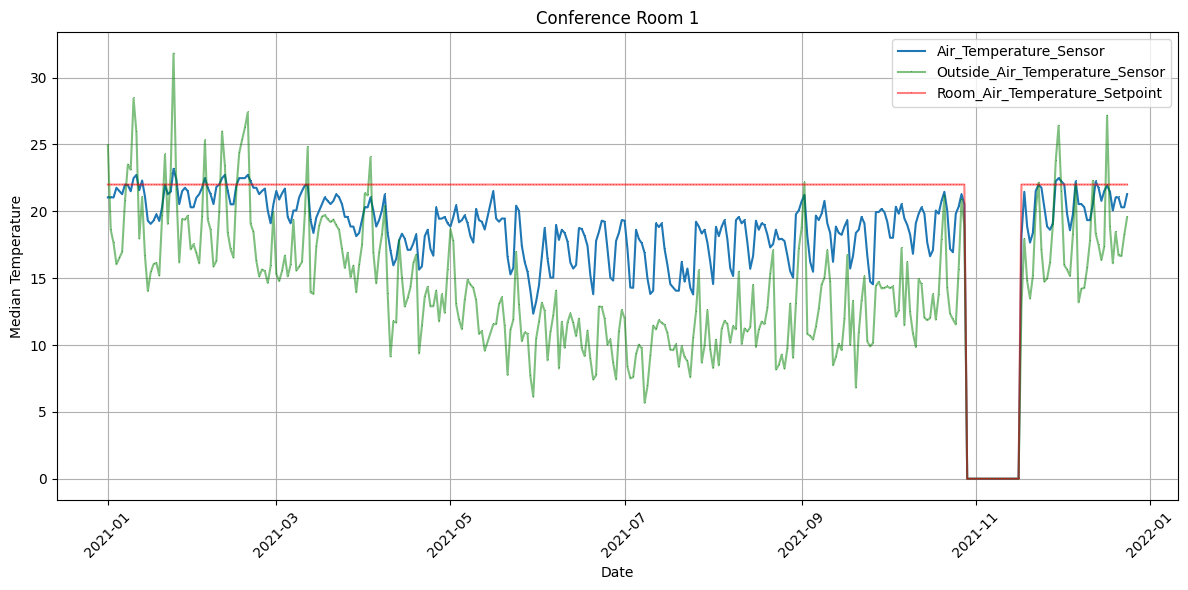

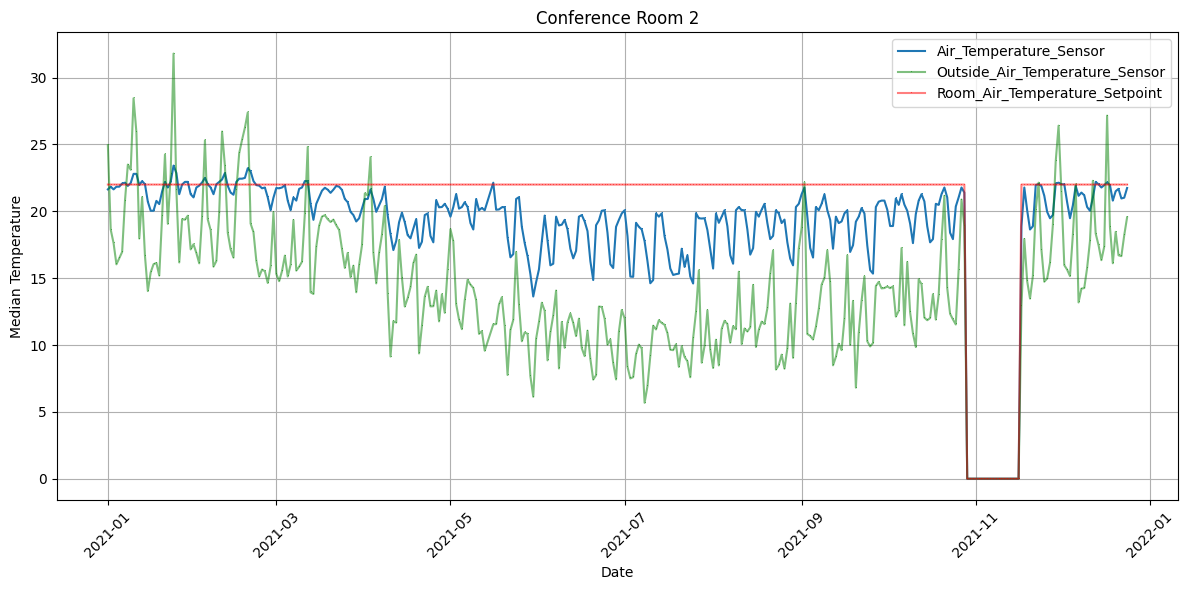

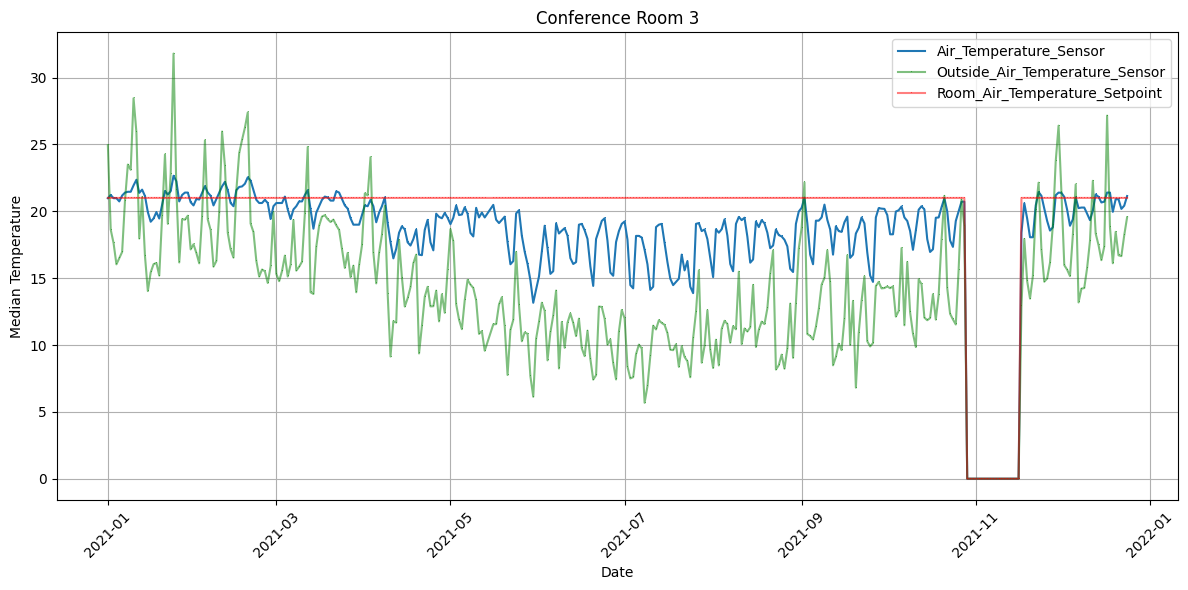

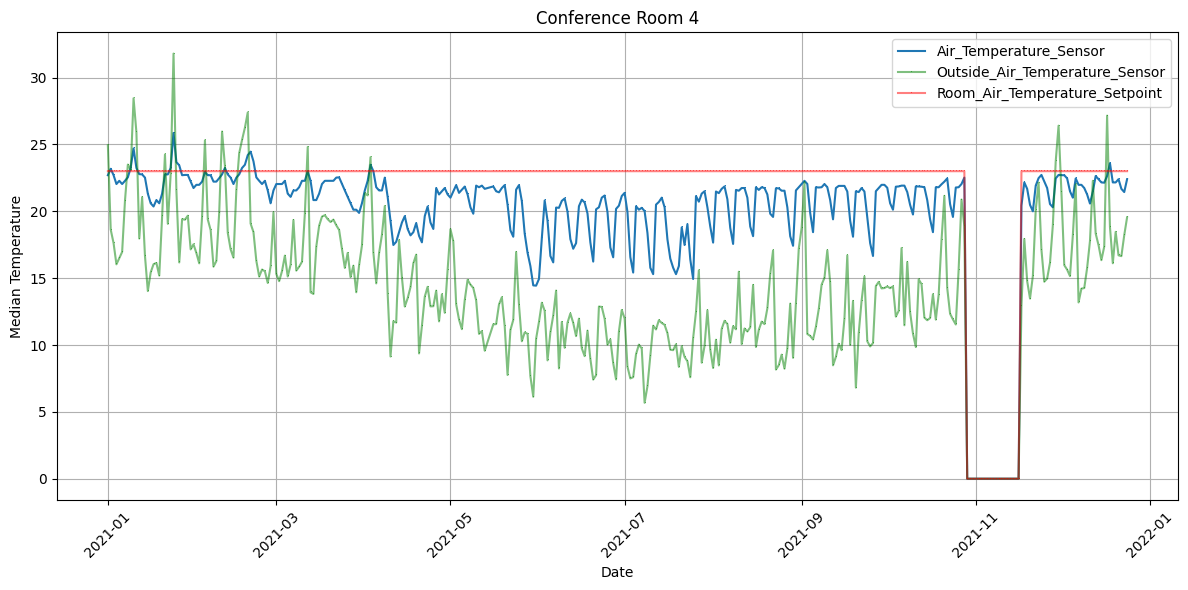

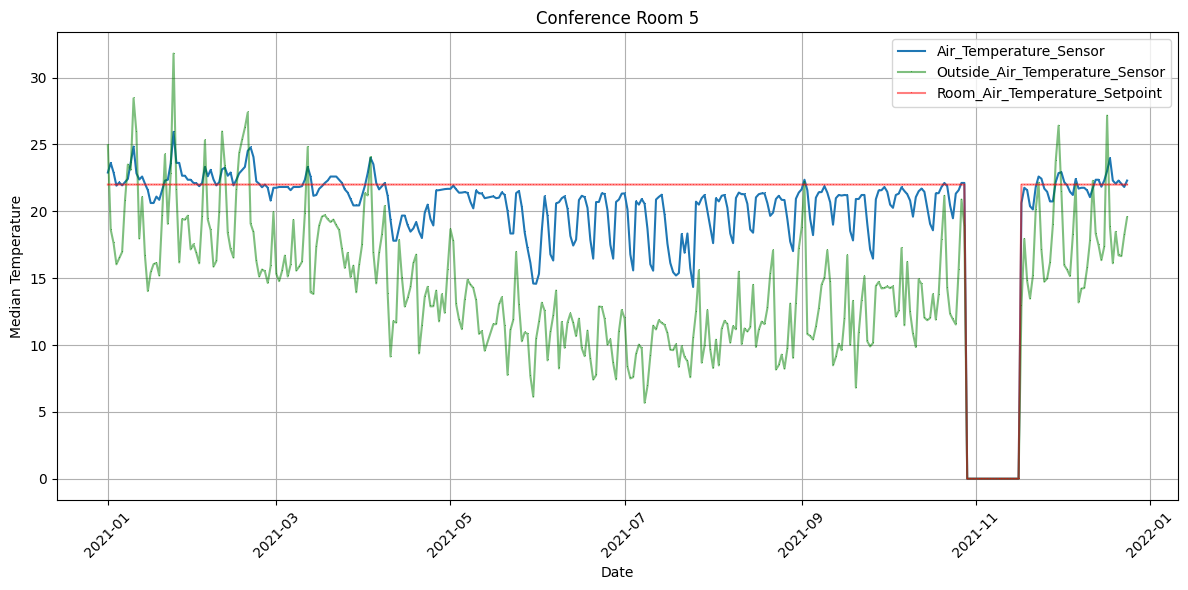

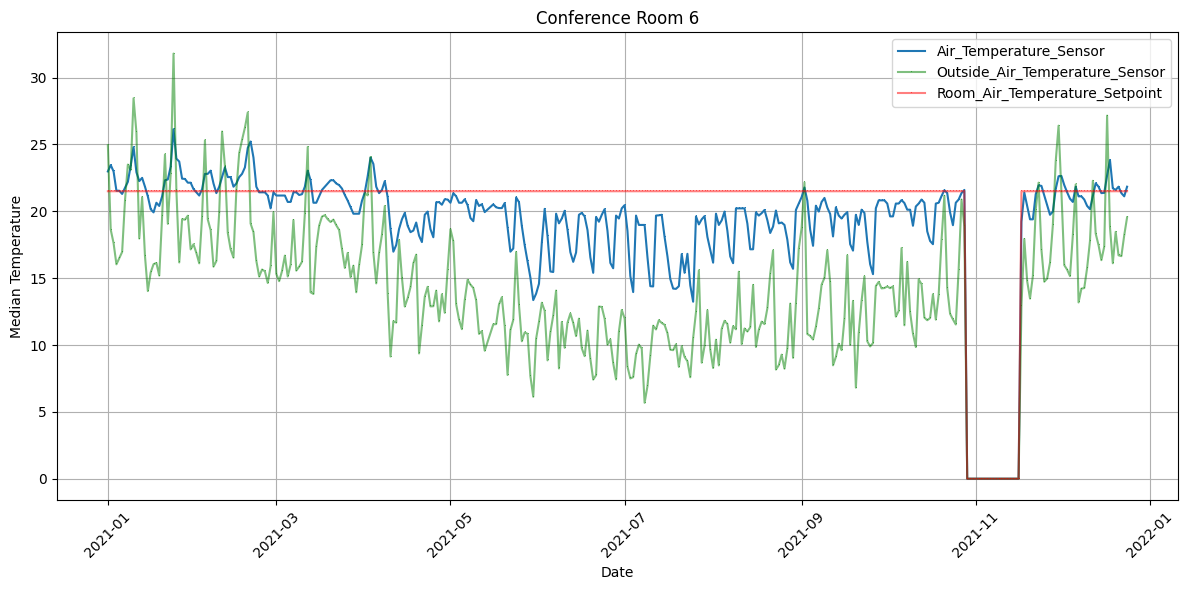

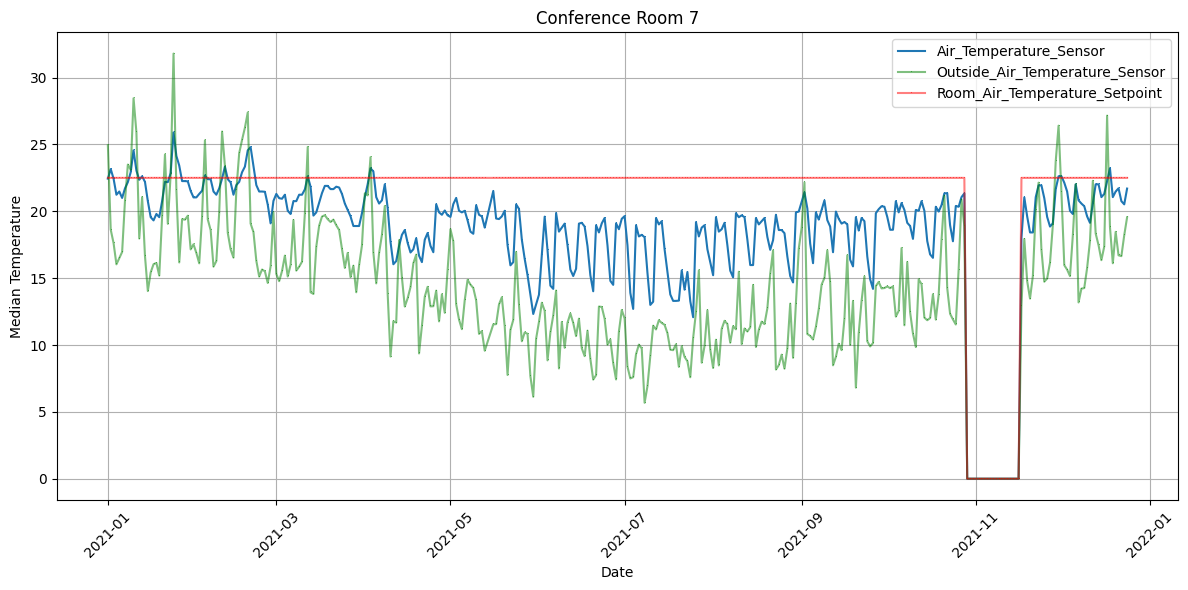

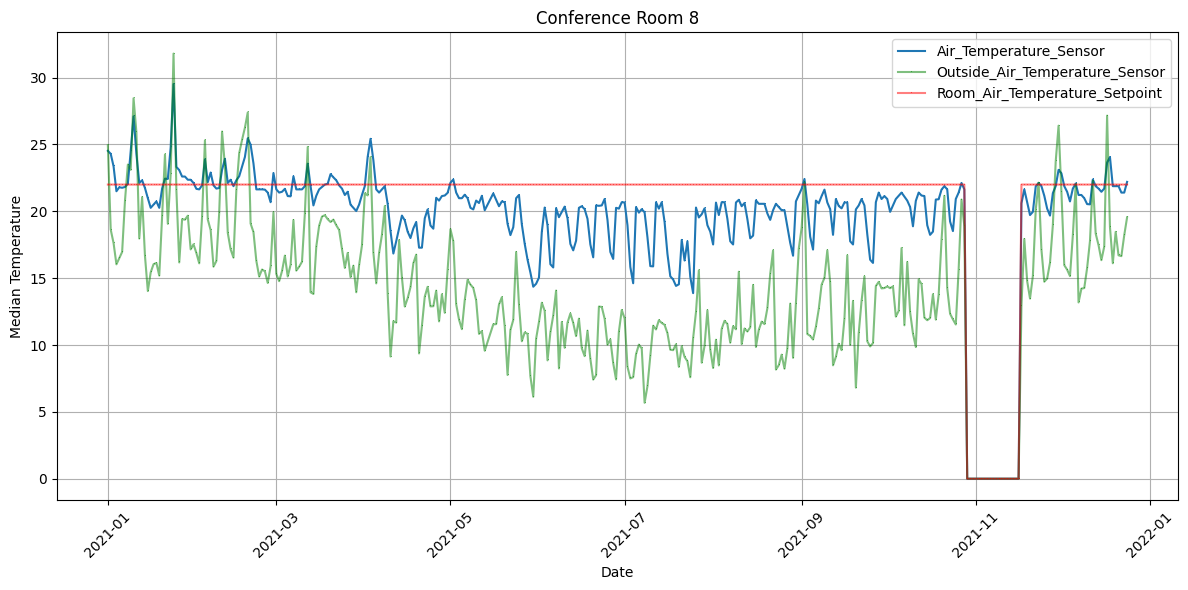

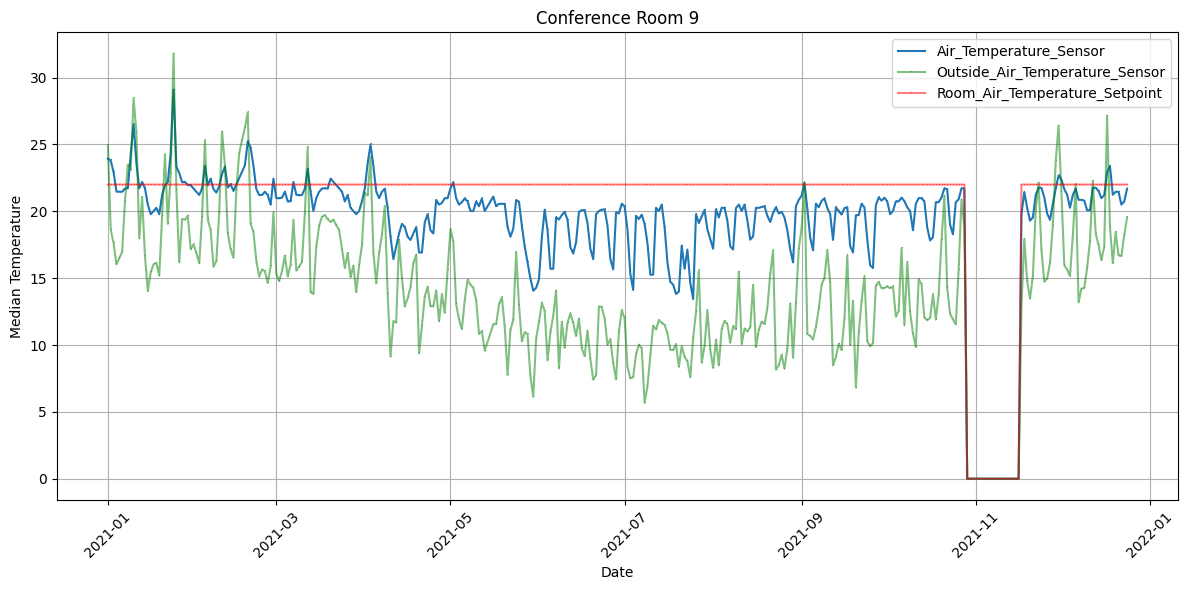

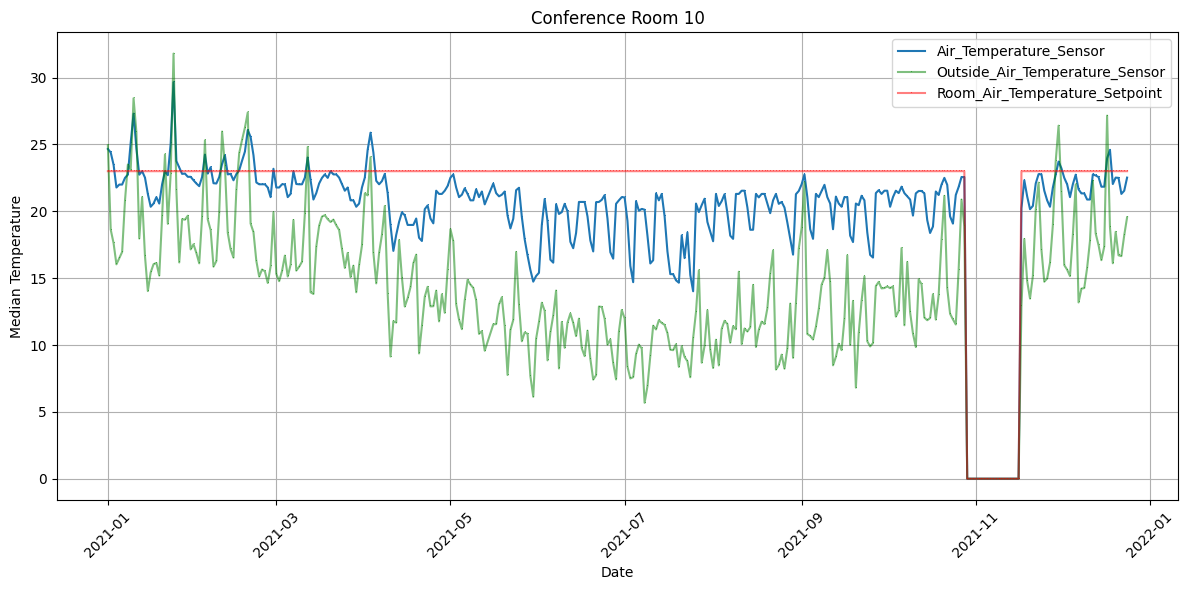

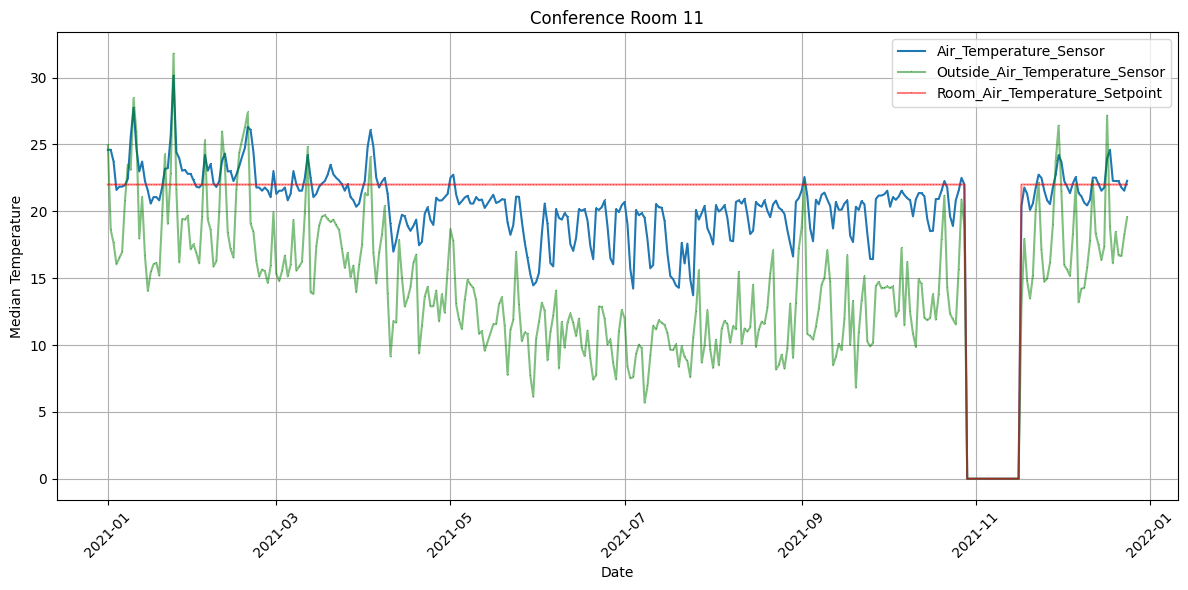

In [69]:
outside_median_df = get_daily_median(outside_air_temperature)

for i, row in enumerate(conference_rooms, start=1):
    conference_room_id = row[0]
    air_temperature_sensor_id = row[1]
    room_air_temperature_setpoint_id = row[2]

    air_temperature_sensor_stream_id = get_stream_id(g, air_temperature_sensor_id)
    room_air_temperature_setpoint_id = get_stream_id(g, room_air_temperature_setpoint_id)

    air_temperature_df = db.get_stream(air_temperature_sensor_stream_id)
    room_air_temperature_setpoint_df = db.get_stream(room_air_temperature_setpoint_id)

    inside_median_df = get_daily_median(air_temperature_df)
    setpoint_median_df = get_daily_median(room_air_temperature_setpoint_df)

    # Create the plot
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(inside_median_df.index, inside_median_df[inside_median_df.columns[0]], label=inside_median_df.columns[0], marker=',')
    ax.plot(outside_median_df.index, outside_median_df[outside_median_df.columns[0]], label=outside_median_df.columns[0], color='g', marker=',', alpha=0.5)
    ax.plot(setpoint_median_df.index, setpoint_median_df[setpoint_median_df.columns[0]], label=setpoint_median_df.columns[0], color='r', marker=',', alpha=0.5)

    title = f'Conference Room {i}'
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Median Temperature')
    plt.legend()
    plt.grid(True)

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()